# Práctica de Laboratorio 8 - Inteligencia Artificial 2025-1 Sección 1 EPISW-FISI
## Implementación de una red PMC-BP con Python y Numpy
### Prof. Rolando A. Maguiña Pérez

## Introducción
La Práctica Guiada de Laboratorio (PGL) 8 a realizarse el Jueves 05 de Junio del presente año, tratará sobre la red Perceptrón Multicapa con su algoritmo de aprendizaje llamado Backpropagation. Esta red se aplicará para resolver problemas genéricos de clasificación y de regresión.

Se desea abordar el problema de la aproximación de una función mediante una Perceptrón Multicapa-Backpropagation (PMC-BP). Inicialmente se presenta la implementación del algoritmo de entrenamiento de esta red (presentado en las sesiones de teoría), con el lenguaje `Python` y sus bibliotecas `Numpy` y `Matplotlib`. Posteriormente, **se propondrán algunos ejercicios cuyas soluciones se podrán obtener en grupos de hasta 4 alumnos**, y deberán enviarse para su respectiva revisión (ver sección 'Instrucciones para el envío' en este mismo cuaderno).  

Requiere: numpy, matplotlib

Nomenclatura:
- Z: número de instancias (muestras) en el conjunto de datos
- N: número de atributos o variables de entrada
- M: número de atributos o variables de salida
- t: vector de salidas esperadas o targets
- y: vector de salidas estimadas por la red.

### Paso previo
Importamos las bibliotecas de Python requeridas.

In [36]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset
El primer paso consiste en obtener el arreglo conteniendo los pares entrada-salida (instancias) a usar en el entrenamiento/validación de la red PMC-BP a implementar; dicho arreglo se denominará 'Dataset'. El tamaño de dicho arreglo es de $Z \times d$, donde $Z$ es el número de instancias (muestras) y $d$ es el número de características o atributos considerados para el problema abordado (incluye los atributos de entrada y los de salida).

In [37]:
Dataset = np.array([[0.00000, 0.00000], [1.00000, 0.84000], [2.00000, 0.91000], [3.00000, 0.14000],
[4.00000, -0.77000], [5.00000, -0.96000],[6.00000, -0.28000], [7.00000, 0.66000], [8.00000, 0.99000]])
Dataset

array([[ 0.  ,  0.  ],
       [ 1.  ,  0.84],
       [ 2.  ,  0.91],
       [ 3.  ,  0.14],
       [ 4.  , -0.77],
       [ 5.  , -0.96],
       [ 6.  , -0.28],
       [ 7.  ,  0.66],
       [ 8.  ,  0.99]])

In [38]:
Dataset.shape

(9, 2)

## Data para el entrenamiento/validación de la red
Como sabemos, a partir del dataset obtenido, se deben determinar los conjuntos de datos a emplear en el entrenamiento y en la validación de la red PMC-BP. Enseguida, se deben obtener dos arreglos: uno con los vectores de entrada a usar en el entrenamiento, y el segundo, con los respectivos vectores de salida. Análogamente, se deben determinar los arreglos con los vectores de entrada y de salida, a usar en la validación del entrenamiento. **Sin embargo, para el problema planteado, el dataset se usará tanto para el entrenamiento como para la validación**.

Separando los valores de entrada de los de salida.

In [39]:
X = Dataset[:,0]
t = Dataset[:,1]
X, t

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 array([ 0.  ,  0.84,  0.91,  0.14, -0.77, -0.96, -0.28,  0.66,  0.99]))

In [40]:
X.shape, t.shape

((9,), (9,))

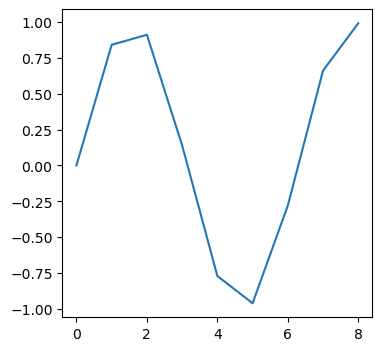

In [41]:
plt.figure(figsize=(4, 4))
plt.plot(X,t)

## Normalización de los datos
Antes de iniciar algún cálculo, sabemos que debemos tener en cuenta las diferencias que existen en las unidades de nuestros datos. Se requiere que los datos de nuestras variables estén en el mismo orden de magnitud, y en un buen número de casos es necesario normalizarlos; de esta manera nuestro modelo trabajará con unidades normalizadas. A pesar de lo indicado, incluso sabedores que hay varios procedimientos de normalización, en este caso, **no vamos a normalizar inicialmente nuestros datos**.

## Diseño de la red
Inicialmente se considera una topología de la red como la mostrada en la figura, vale decir, con 10 neuronas ocultas. Como función de activación de las neuronas ocultas se usará la logística sigmoidea y en las neuronas de salida, dado que se trata de un problema de aproximación de funciones, se usará una función lineal.

In [42]:
from IPython.display import Image
i = Image(filename='D:\\Cursos\\Redes Neuronales\\2021-2\\arquit-red_aprox-fc_2021-2.png')
i

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Cursos\\Redes Neuronales\\2021-2\\arquit-red_aprox-fc_2021-2.png'

## Inicialización de los pesos y biases de la red
Según el algoritmo, los parámetros libres de la red se inicializan a valores aleatorios pequeños, los cuales pueden estar en el rangos: [-0.5,0.5] o [-1,1] o en torno de cero. A continuación se presenta el código para inicializarlos, aplicado al **problema planteado**.

In [ ]:
# Implementación básica sin funciones
intervalo = 0.5
capa_entrada = 1
capa_oculta = 10
capa_salida = 1

w1 = np.random.uniform(-intervalo, intervalo, capa_oculta)

w2 = np.random.uniform(-intervalo, intervalo, capa_oculta)

In [ ]:
w1, w2

(array([ 0.31363851, -0.14824543, -0.11532856, -0.47448722,  0.30202055,
        -0.07598017,  0.36598791, -0.46703207,  0.15857095, -0.43671307]),
 array([ 0.16887422, -0.3305602 ,  0.02856265, -0.0367157 ,  0.03012444,
         0.28213003,  0.36947367, -0.12383828,  0.18071988,  0.46923731]))

In [ ]:
w1.shape, w2.shape

((10,), (10,))

### Definición de la función logística sigmoidea
Sabemos que la expresión matemática de la función logística sigmoidea `f(n)` es:

                         f(u) =  1/1 + exp(-u)

donde `u` es el vector de entradas netas. A partir de dicho parámetro, es posible calcular la función logistica sigmoidea; en la sgte celda se presenta el respectivo código.

In [ ]:
# Funcion de activacion Logistica Sigmoidea para la unidad de salida
def logistica(u):
    return 1/(1 + np.exp(-u))

Supongamos que se desea aplicar esta función al arreglo 'a'.

In [ ]:
a = np.array([[0, 0.6, -0.8]])
a

array([[ 0. ,  0.6, -0.8]])

In [ ]:
logistica(a)

array([[0.5       , 0.64565631, 0.31002552]])

A continuación se presenta la implementación de la derivada de la función logística sigmoidea:

In [ ]:
def deriv_logistica(x):
    return x * (1.0 - x)

In [ ]:
deriv_logistica(-1.76)

-4.8576

## Implementación
Luego de haber determinado la topología de la red neuronal, la implementaremos en el lenguaje de programación `Python` con la ayuda de su biblioteca `Numpy`. Enseguida, se efectuarán las sgtes actividades:

- Construiremos el algoritmo de aprendizaje de nuestra red PMC, Backpropagation, mediante la función `train()`. Dentro de ella se instancian constantes y variables importantes como globales, de modo que estos valores sean accesibles para toda la función.
- Aplicaremos dicho algoritmo de aprendizaje para resolver el problema de aproximación de una función planteado; para tal efecto, se usará el conjunto de datos disponible.

En las sgtes celdas se presentan las líneas de código correspondientes.

In [ ]:
import numpy as np

In [ ]:
Dataset = np.array([[0.00000, 0.00000], [1.00000, 0.84000], [2.00000, 0.91000], [3.00000, 0.14000],
[4.00000, -0.77000], [5.00000, -0.96000],[6.00000, -0.28000], [7.00000, 0.66000], [8.00000, 0.99000]])

In [ ]:
X = Dataset[:,0]
t = Dataset[:,1]
X, t

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 array([ 0.  ,  0.84,  0.91,  0.14, -0.77, -0.96, -0.28,  0.66,  0.99]))

In [ ]:
def train(X, t, learning_rate=0.2, epochs=50):
    global input_num
    global hidden_num
    global w1
    global w2

    input_num = 1
    hidden_num = 10
    output_num = 1
    intervalo = 0.5

    # inicializando los pesos
    w1 = np.random.uniform(-intervalo, intervalo, hidden_num)

    w2 = np.random.uniform(-intervalo, intervalo, hidden_num)

    for epoch in range(epochs):
        gradient_out = 0.0                 # gradientes para la capa de salida y la capa oculta
        gradient_hidden = []

        for i in range(X.shape[0]):
        # propagacion hacia adelante
            x = X[i]

            u1 = x * w1
            o = logistica(u1)
            u2 = o.dot(w2)
            y = u2

        # backpropagation
            delta_hidden_s = []           # inicializamos los delta_j a lista vacía
            gradient_hidden_s = []       # inicializamos los gradientes de neurs ocultas a lista vacía

            delta_out_s = t[i] - y     # cálculo del único delta_k (f'(u) = 1 pq fc de activ es lineal)
            gradient_out_s = delta_out_s * o     # error por la salida de la capa anterior

            for j in range(hidden_num):

                delta_hidden_s.append(deriv_logistica(u1[j]) * w2[j] * delta_out_s)
                gradient_hidden_s.append(delta_hidden_s[j] * x)


            gradient_out = gradient_out + gradient_out_s
            gradient_hidden = gradient_hidden + gradient_hidden_s


        print("\n#", epoch, "Gradient out: ",gradient_out),
        print("\n     Weights  out: ", w1, w2)

        # Ahora actualizando pesos
        w2 = w2 + learning_rate * gradient_out

        for j in range(hidden_num):
            w1[j] = w1[j] + learning_rate * gradient_hidden[j]

In [ ]:
train(X, t)


# 0 Gradient out:  [4.55032902 3.99588928 2.18558607 3.57836834 5.68981355 1.58579721
 6.1969063  6.14822678 6.55633718 3.62899824]

     Weights  out:  [ 0.06344919 -0.00187795 -0.26144234 -0.05084979  0.23101741 -0.44071259
  0.35373613  0.3391126   0.49485115 -0.04481661] [ 0.15432564 -0.39507629  0.3918821  -0.33849019  0.28772399  0.01785262
 -0.40524365 -0.02617312 -0.34005255 -0.3608523 ]

# 1 Gradient out:  [-23.55619843 -20.69470758 -10.98868836 -18.54201844 -29.71057124
  -7.38907647 -32.69695894 -32.40267715 -34.87905876 -18.80398552]

     Weights  out:  [ 0.06344919 -0.00187795 -0.26144234 -0.05084979  0.23101741 -0.44071259
  0.35373613  0.3391126   0.49485115 -0.04481661] [1.06439144 0.40410157 0.82899931 0.37718348 1.4256867  0.33501206
 0.83413761 1.20347224 0.97121488 0.36494735]

# 2 Gradient out:  [123.62970742 108.58078662  57.91034397  97.25731722 155.71418452
  39.50420171 171.03719075 169.53429574 182.17011454  98.63434998]

     Weights  out:  [ 0.06344919 -0.

## Ejercicios
### Ejercicio A  (3 puntos)
1. Obtenga, a partir del código presentado para el entrenamiento de la PMC-BP, el algoritmo de recuerdo de la red.
2. Aplique ahora dicho algoritmo de recuerdo en la etapa denominada *Validación* para el mismo problema de regresión. Determine el error cuadrático de la red en cada época y grafique sus resultados.

### Ejercicio B  (5 puntos)
1. Use la función tangente hiperbólica en lugar de la lineal en la capa de salida para abordar el mismo problema. Con ese objetivo defina la(s) función(nes) que se requieran e insértelas en el código de modo que la red funcione correctamente. Mantenga inalterada la arquitectura de la red.
2. A partir de las modificaciones pedidas, entrene nuevamente la red al mismo problema de regresión. Enseguida aplique el algoritmo de recuerdo.
3. Compare los resultados que obtenga con los obtenidos con la red PMC-BP que usaba una función lineal en la salida.

### Ejercicio C (4 puntos)
1. Modifique la arquitectura de la red PMC usando ahora 4, 6, 8 y 12 neuronas en la capa oculta. Aplique las etapas de entrenamiento/validación de la red.
2. Determine el mejor modelo, indicando específicamente con cuántas neuronas ocultas obtuvo la mejor respuesta de la red.

### Ejercicio D (8 puntos)
1. Modifique la arquitectura de la red PMC usando ahora **dos capas ocultas**, inicialmente con 10 neuronas en la primera capa oculta y 8 neuronas en la segunda capa oculta. Use diferentes números de neuronas en las capas ocultas. Aplique las etapas de entrenamiento/validación de la red para cada combinación.
2. Determine con qué combinación de neuronas en las capas ocultas obtuvo el mejor modelo, el que produjo la mejor respuesta de la red.


## Instrucciones para el envío de la solución
La solución de la "Práctica de Laboratorio 8 IA 2025-1 EPISW" deberá enviarse al correo electrónico rmaguinacursos@gmail.com, hasta las 23:59 h del Domingo 08 de Junio del 2025 en un cuaderno computacional interactivo (archivo con extensión .ipynb).

El documento deberá tener las sgtes características:
- Nombre del archivo: solPGL8_IA_2025-1_EPISW_nombre-apellidos_integrantes.ipynb.
- Todas las preguntas de la Práctica deben responderse en el mismo cci (**Sugerencia**: obtener una copia de este documento y desarrollar en ellas las respectivas soluciones); la solución a cada pregunta debe registrarse en una celda debajo del planteamiento de la misma, mencionando explícitamente como subtítulo: \"Solución del ejercicio n\", donde \"n\" corresponde al número del ejercicio."


### Solución del ejercicio B

Algoritmo de entramiento con tanh como función de activación de salida

In [ ]:
def deriv_tanh(u):
    return 1 - np.tanh(u) ** 2

def train_tanh(X, t, learning_rate=0.2, epochs=50):
    global input_num
    global hidden_num
    global w1
    global w2

    input_num = 1
    hidden_num = 10
    output_num = 1
    intervalo = 0.5

    # inicializando los pesos
    w1 = np.random.uniform(-intervalo, intervalo, hidden_num)

    w2 = np.random.uniform(-intervalo, intervalo, hidden_num)

    for epoch in range(epochs):
        gradient_out = 0.0                 
        gradient_hidden = []

        for i in range(X.shape[0]):
        # propagacion hacia adelante
            x = X[i]

            u1 = x * w1
            o = logistica(u1)
            u2 = o.dot(w2)
            y = np.tanh(u2)  #Función de activación tanh para la salida

        # backpropagation
            delta_hidden_s = []           
            gradient_hidden_s = []       

            delta_out_s = (t[i] - y)* deriv_tanh(u2)     
            gradient_out_s = delta_out_s * o     

            for j in range(hidden_num):

                delta_hidden_s.append(deriv_logistica(u1[j]) * w2[j] * delta_out_s)
                gradient_hidden_s.append(delta_hidden_s[j] * x)


            gradient_out = gradient_out + gradient_out_s
            gradient_hidden = gradient_hidden + gradient_hidden_s


        print("\n#", epoch, "Gradient out: ",gradient_out),
        print("\n     Weights  out: ", w1, w2)

        # Ahora actualizando pesos
        w2 = w2 + learning_rate * gradient_out

        for j in range(hidden_num):
            w1[j] = w1[j] + learning_rate * gradient_hidden[j]

def recall_tanh(X, t):
    predictions = []
    for i in range(X.shape[0]):
        x = X[i]
        u1 = x * w1
        o = logistica(u1)
        u2 = o.dot(w2)
        y = np.tanh(u2)  # Activación en salida
        predictions.append(y)

    predictions = np.array(predictions)
    mse = np.mean((predictions - t)**2)
    print("\nTanh error cuadrático medio (ECM):", mse)

    return predictions, mse

def recall(X, t):
    predictions = []
    for i in range(X.shape[0]):
        x = X[i]
        u1 = x * w1
        o = logistica(u1)
        u2 = o.dot(w2)
        y = u2  # salida lineal
        predictions.append(y)

    predictions = np.array(predictions)
    mse = np.mean((predictions - t)**2)
    print("\nLineal error cuadrático medio (ECM):", mse)

    return predictions, mse

Hallando por cada algoritmo el promedio de sus MSE de 10 entrenamientos.

In [77]:
import numpy as np

errors_linear = []
errors_tanh = []

for _ in range(10):
    train(X, t)
    _, mse_lin = recall(X, t)
    errors_linear.append(mse_lin)

    train_tanh(X, t)
    _, mse_tanh = recall_tanh(X, t)
    errors_tanh.append(mse_tanh)

print("Promedio MSE salida lineal:", np.mean(errors_linear), "±", np.std(errors_linear))
print("Promedio MSE salida tanh:", np.mean(errors_tanh), "±", np.std(errors_tanh))



# 0 Gradient out:  [-0.30212572 -1.58649243 -1.33859348 -0.81874667 -0.19067526 -1.71732829
 -1.14505589 -0.17059909 -0.90466491 -1.50675992]

     Weights  out:  [-0.35903762  0.32954707  0.18081846 -0.06791612 -0.4647426   0.44286497
  0.08508216 -0.48938243 -0.02758821  0.2760401 ] [ 0.34889113  0.38083148  0.04620543  0.47276791 -0.34887285 -0.01869391
 -0.22296936 -0.16979309  0.16439634  0.06628098]

# 1 Gradient out:  [1.10587404 3.15440942 2.81212633 1.88418706 0.96370972 3.31982755
 2.49042089 0.93639162 2.04326017 3.05130954]

     Weights  out:  [-0.35903762  0.32954707  0.18081846 -0.06791612 -0.4647426   0.44286497
  0.08508216 -0.48938243 -0.02758821  0.2760401 ] [ 0.28846599  0.06353299 -0.22151326  0.30901858 -0.3870079  -0.36215957
 -0.45198054 -0.20391291 -0.01653664 -0.235071  ]

# 2 Gradient out:  [-0.16040196 -0.48086076 -0.42190965 -0.28680935 -0.13411334 -0.51151357
 -0.37296714 -0.12921825 -0.30946312 -0.46223415]

     Weights  out:  [-0.35903762  0.32954707  

Se observa que el Error Cuadrático Medio (MSE) obtenido con activación lineal en la capa de salida es consistentemente más alto, con un promedio cercano a 1.422. En contraste, al emplear la función tangente hiperbólica (tanh) como activación de salida, el modelo logra un MSE promedio de aproximadamente 0.794.

Este resultado sugiere que la red con activación tanh en la salida ofrece un mejor desempeño predictivo, al adaptarse más eficazmente a la distribución del conjunto de datos.
La función tanh, al ser no lineal y acotada en [-1, 1], proporciona una salida más adecuada para problemas donde las variables objetivo también están dentro de ese rango, favoreciendo una mejor aproximación a la función real y facilitando la convergencia del modelo.

